In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scikitplot as skplt

In [2]:
def sigmoid(x, deriv=False):
    if deriv:
        return x * (1 - x)  # This x is actually sigmoid(x), not the ind var x

    return 1 / (1 + np.exp(-x))


def relu(x, deriv=False):
    if type(x) == list:
        x = np.array(x)
    if deriv:
        # outlist = []
        # xflat = x.flatten()
        # for xp in xflat:
        #     if xp > 0:
        #         outlist.append(1)
        #     else:
        #         outlist.append(0)
        # outlist = np.array(outlist)
        # outlist = outlist.reshape(x.shape)
        outlist = x > 0
        outlist = outlist.astype(int)
        return outlist
    # outlist = []
    # xflat = x.flatten()
    # for xp in xflat:
    #     if xp > 0:
    #         outlist.append(xp)
    #     else:
    #         outlist.append(0)
    # outlist = np.array(outlist)
    # outlist = outlist.reshape(x.shape)
    outlist = x.clip(min=0)
    return outlist


def relumod(x, deriv=False):
    slope = 0.1
    if type(x) == list:
        x = np.array(x)
    if deriv:
        outlist = []
        xflat = x.flatten()
        for xp in xflat:
            if xp > 0:
                outlist.append(1)
            else:
                outlist.append(slope)
        outlist = np.array(outlist)
        outlist = outlist.reshape(x.shape)
        return outlist
    outlist = []
    xflat = x.flatten()
    for xp in xflat:
        if xp > 0:
            outlist.append(xp)
        else:
            outlist.append(xp * slope)
    outlist = np.array(outlist)
    outlist = outlist.reshape(x.shape)
    return outlist


def add_bias(x):
    X_new = np.ones((x.shape[0], x.shape[1] + 1))
    X_new[:, 1:] = x
    return X_new


def quad_cost_p(yl, lastlyr):
    return yl - lastlyr


def cross_ent_cost_p(yl, lastlyr): #Penalty for wrong label
    lastlyr -= 0.00000001
    cost = (yl - lastlyr) / ((1 - lastlyr) * lastlyr)  # Is the sign correct? 
    return cost




In [3]:
#For particle data
def StringMatToFloat(inlist):
    if type(inlist[0])==list:
        outlist=[]
        for i in range(len(inlist)):
            outlist.append([])
            for j in inlist[i]:
                outlist[i].append(float(j))
    else:
        outlist=[]
        for i in inlist:
            outlist.append(float(i))
    return outlist

def ImportData(filepath,NTraining,NValidation,seperator,Header=True):
    file=open(filepath)
    data=[]
    valdata=[]
    count=0
    if Header:
        for line in file:
            count+=1
            if count==1:
                Namelist=line.split(seperator)
            elif count<=NTraining:
                data.append(StringMatToFloat(line.split(seperator)))
            elif count>NTraining:
                valdata.append(StringMatToFloat(line.split(seperator)))
            if count>=NTraining+NValidation:
                break    
        return data,valdata,Namelist
    else:
        for line in file:
            count+=1
            if count<=NTraining:
                data.append(StringMatToFloat(line.split(seperator)))
            elif count>NTraining:
                valdata.append(StringMatToFloat(line.split(seperator)))
            if count>NTraining+NValidation+1:
                break
        return data,valdata

In [10]:
###################################### Import data ##############################################

useadvBDTdat = False
usesimBDTdat = False
useParticleDat = True

if useadvBDTdat:
    data = np.genfromtxt('\Users\Sofie\Documents\Uni\AS2\Uge 6\BDT_16var.txt')
    #data = np.genfromtxt('/Users/idastoustrup/Documents/Dropbox/Skole/Fysiske Fag/4. year/AnvStat2/Exercises/Week 6/'
    #                     'BDTs/BDT_16var.txt')
    data = data.T
    data = data[1:len(data)]
    data = data.T
    endtrain = int(len(data)/2)
    datatest = data[endtrain:len(data)]
    datatrain = data[0:endtrain]
    Ndhalf = len(datatrain)/2
    y = [0, 1]*int(Ndhalf)
    y = np.array(y)
    y = y.reshape(len(datatrain), 1)
    X = np.array(datatrain)

    testX = np.array(datatest)

    for i in range(len(testX[0])):
        minx = min(testX.T[i])
        maxx = max(testX.T[i])
        rangex = abs(minx) + maxx
        testX.T[i] = testX.T[i] / rangex

    Ndhalft = len(datatest) / 2
    testy = [0, 1] * int(Ndhalft)
    testy = np.array(testy)
    testy = testy.reshape(len(datatest), 1)

elif usesimBDTdat:
    datateb = np.genfromtxt('\Users\Sofie\Documents\Uni\AS2\Uge 6\BDT_background_test.txt')
    datatrb = np.genfromtxt('\Users\Sofie\Documents\Uni\AS2\Uge 6\BDT_background_train.txt')
    datates = np.genfromtxt('\Users\Sofie\Documents\Uni\AS2\Uge 6\BDT_signal_test.txt')
    datatrs = np.genfromtxt('\Users\Sofie\Documents\Uni\AS2\Uge 6\BDT_signal_train.txt')

    #datateb = np.genfromtxt('/Users/idastoustrup/Documents/Dropbox/Skole/Fysiske Fag/4. year/AnvStat2/Exercises/Week 6/'
    #                        'BDTs/BDT_background_test.txt')
    #datatrb = np.genfromtxt('/Users/idastoustrup/Documents/Dropbox/Skole/Fysiske Fag/4. year/AnvStat2/Exercises/Week 6/'
    #                        'BDTs/BDT_background_train.txt')
    #datates = np.genfromtxt('/Users/idastoustrup/Documents/Dropbox/Skole/Fysiske Fag/4. year/AnvStat2/Exercises/Week 6/'
    #                        'BDTs/BDT_signal_test.txt')
    #datatrs = np.genfromtxt('/Users/idastoustrup/Documents/Dropbox/Skole/Fysiske Fag/4. year/AnvStat2/Exercises/Week 6/'
    #                        'BDTs/BDT_signal_train.txt')

    X = np.concatenate((datatrb, datatrs), axis=0)
    y = np.append(np.zeros(len(datatrb)), np.ones(len(datatrs)))
    y = y.reshape(len(X), 1)

    testX = np.concatenate((datateb, datates), axis=0)

    for i in range(len(testX[0])):
        minx = min(testX.T[i])
        maxx = max(testX.T[i])
        rangex = abs(minx) + maxx
        testX.T[i] = testX.T[i] / rangex

    testy = np.append(np.zeros(len(datateb)), np.ones(len(datates)))
    testy = testy.reshape(len(testX), 1)
elif useParticleDat:
    data, valdata =ImportData("\Users\Sofie\Documents\Uni\AS2\Project 2 - ANN\MC05_Shuffled_NoHeader.csv",1e3,1e2,",",Header=False) 
    #header = ["p_Rhad1","p_Rhad","p_f3","p_weta2","p_Rphi","p_Reta","p_Eratio","p_f1","p_eta","p_ptPU30","averageInteractionsPerCrossing","p_etcone20","p_etcone30","p_etcone40","p_etcone20ptCorrection","p_etcone30ptCorrection","p_etcone40ptCorrection","p_ptcone20","p_ptcone30","p_ptcone40","p_numberOfInnermostPixelHits","p_numberOfPixelHits","p_numberOfSCTHits","p_d0","p_d0Sig","p_dPOverP","p_deltaEta1","p_deltaPhiRescaled2","p_EptRatio","p_TRTPID","p_numberOfTRTHits","p_TRTTrackOccupancy","p_numberOfTRTXenonHits","Z_m","p_LHValue","p_et_calo","mva_Calo_kBDT_conf1_mc","mva_Iso_kBDT_conf1_mc","mva_Track_kBDT_conf1_mc","mva_kBDT_conf1_mc_final","label0","label1","p_TruthType","Truth"]   
    data = np.array(data) 
    valdata = np.array(valdata) #Not used yet
    
    X = data[:,range(0,7+1) + range(20,29+1)] #0-7 er calorimeter, 20-29 er tracking
    y = []
    for i,x in enumerate(data):
        if data[i,[40]] == 1 and data[i,[42]] == 2: #label0 and p_TruthType
            y.extend([1])
        else:
            y.extend([0])
            
    testX = valdata[0,range(0,7+1) + range(20,29+1)] #0-7 er calorimeter, 20-29 er tracking         
    testy = []
    for i,x in enumerate(data):
        if data[i,[40]] == 1 and data[i,[42]] == 2: #label0 and p_TruthType
            testy.extend([1])
        else:
            testy.extend([0])
else:

    X = np.array([[0, 0, 0, 1],
                 [0, 1, 0, 0],
                 [1, 0, 0, 0],
                 [0, 1, 1, 0],
                 [1, 1, 1, 0],
                 [0, 0, 1, 1]])

    y = np.array([[1],
                  [1],
                  [1],
                  [0],
                  [0],
                  [0]])

    testX = np.array([[1, 0, 1, 0],
                      [1, 0, 1, 1],
                      [0, 0, 1, 0],
                      [1, 0, 0, 1]])

    testy = np.array([[0],
                      [0],
                      [1],
                      [0]])

# Data normalisation

for i in range(len(X[0])):
    minx = min(X.T[i])
    maxx = max(X.T[i])
    rangex = abs(minx) + maxx
    X.T[i] = X.T[i]/rangex

In [11]:

####################################### Network settings ###############################################

np.random.seed(1)

act_fcn = sigmoid
cost_fcn_p = cross_ent_cost_p
LR = 10**(-4) #?
Nit = 5000#0
Nprint = 100
layersize = [len(X[0]), len(X[0])*5, len(X[0])*5, 1] #For 4 lag?
bias = False

print("\n" + "Current Settings: LR = %f, NLayers = %i"%(LR, len(layersize)))


# Set #1 of settings for BDTsimdat

# act_fcn = sigmoid
# cost_fcn_p = quad_cost_p
# LR = 0.01
# Nit = 15000
# Nprint = 1000
# layersize = [len(X[0]), len(X[0])*4, len(X[0])*3, 1]
# bias = False


# Set #2 of settings for BDTsimdat

# act_fcn = sigmoid
# cost_fcn_p = cross_ent_cost_p
# LR = 10**(-4)
# Nit = 15000
# Nprint = 1000
# layersize = [len(X[0]), len(X[0])*4, len(X[0])*3, 1]
# bias = False


Current Settings: LR = 0.000100, NLayers = 4


In [12]:
###################################### Train the network #########################################################

# Add bias to X

if bias:
    X = add_bias(X)

# Randomly initialize weights with range -1 to 1

if bias:

    weights = [0] * len(layersize)
    for i in range(0, len(layersize)-1):
        weights[i] = 2 * np.random.random((layersize[i] + 1, layersize[i + 1])) - 1
else:
    weights = [0] * len(layersize)
    for i in range(0, len(layersize) - 1):
        weights[i] = 2 * np.random.random((layersize[i], layersize[i + 1])) - 1 #random weights

NLayers = len(layersize)

layers = [0] * NLayers
lerrors = [0] * NLayers
ldeltas = [0] * NLayers

In [13]:
for j in range(Nit + 1):

    ############ FEED FORWARD ###########
     # fra X forudsig Y. 
    layers[0] = X
    for i in range(1, NLayers):
        layers[i] = act_fcn(np.dot(layers[i-1], weights[i-1])) #Lag * vægt gennem acti -> Y

        if bias and not i == NLayers - 1:
            layers[i] = add_bias(layers[i])

    ########### FEED BACKWARDS #########

    lerrors[-1] = cost_fcn_p(y, layers[-1]) #Penalty for wrong prediction. Not simply the difference
    for i in range(NLayers - 1, 0, -1):

        ldeltas[i] = lerrors[i] * act_fcn(layers[i], deriv=True) #How large penalty, and how sure it is -> how much to change the weights

        if bias and i < NLayers - 1:
            ldeltasn = ldeltas[i][:, 1:]
            lerrors[i - 1] = ldeltasn.dot(weights[i - 1].T)
            weights[i - 1] += layers[i - 1].T.dot(ldeltasn) * LR

        else:
            lerrors[i - 1] = ldeltas[i].dot(weights[i - 1].T) #Contribution from l1 to l2 error. Error of prevoius layer  from change in current and weights in previous. 
            weights[i - 1] += layers[i - 1].T.dot(ldeltas[i]) * LR #Change previous weights by previous values and change in current layer

    if j % Nprint == 0:
        print("\nj is %i out of %i"%(j, Nit))
        print("The error has been decreased to %f, given the chosen cost fcn. "
              "The linear error is %f."%(np.mean(np.abs(lerrors[-1])), np.mean(np.abs(quad_cost_p(y, layers[-1])))))

ValueError: shapes (1000,1000) and (1,90) not aligned: 1000 (dim 1) != 1 (dim 0)

In [ ]:
###################################### Test the network #########################################################

for i in range(5):
    print("\n" + "%i, training set"%i)
    print("Class should have been %i, the ANN guesses %f"%(y[i], layers[-1][i]))

testlayers = [0] * NLayers
testlayers[0] = testX

for i in range(1, NLayers):
    testlayers[i] = act_fcn(np.dot(testlayers[i-1], weights[i-1]))

print("\n" + "The linear error for the test set is: " + str(np.mean(np.abs(testy - testlayers[-1]))))

0  of  8000
500  of  8000
1000  of  8000
1500  of  8000
2000  of  8000
2500  of  8000
3000  of  8000
3500  of  8000
4000  of  8000
4500  of  8000
5000  of  8000
5500  of  8000
6000  of  8000
6500  of  8000
7000  of  8000
7500  of  8000


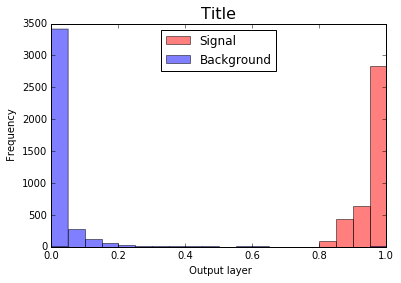

In [82]:
###################################### Histograms #########################################################

plt.figure()  

#y_pred_s = [x for i,x in enumerate(layers[-1]) if y[i]==1] #predicted y for real signal
#y_pred_b = [x for i,x in enumerate(layers[-1]) if y[i]==0] #predicted y for real background

y_pred_s = [] #predicted y for real signal
y_pred_b = [] #predicted y for real background


for i,x in enumerate(layers[-1]):
    if y[i]==1:
        y_pred_s=np.append(y_pred_s,x)
    else:
        y_pred_b=np.append(y_pred_b,x)
    if i % 500 == 0:
        print (i, " of ", len(layers[-1]))

binwidth = 0.05
plt.hist(y_pred_s, 20, range=[0,1] ,normed=0, facecolor='red',alpha=0.5) #counts, bins, patches = #bins=range(min(y_pred_s), max(y_pred_s) + binwidth, binwidth)
plt.hist(y_pred_b, 20,range=[0,1] ,normed=0, facecolor='blue',alpha=0.5)
plt.xlabel(' Output layer')
plt.ylabel(' Frequency')

plt.legend(["Signal","Background"],loc = 'upper center')
plt.title("Title",fontsize=16)

#plt.xlim(0,1)
#plt.ylim(0,4)
plt.show()

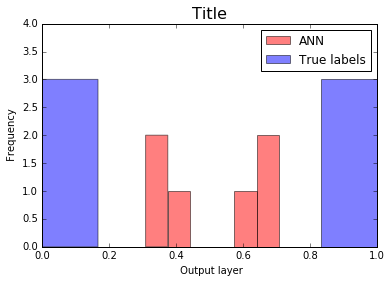

In [21]:
plt.figure()  # X
binwidth = 0.04 
counts, bins, patches = plt.hist(layers[-1], 6 ,normed=0, facecolor='red',alpha=0.5)
plt.hist(y, 6 ,normed=0, facecolor='blue',alpha=0.5)
plt.xlabel(' Output layer')
plt.ylabel(' Frequency')

plt.legend(["ANN","True labels"])
plt.title("Title",fontsize=16)

plt.xlim(0,1)
plt.ylim(0,4)
plt.show()

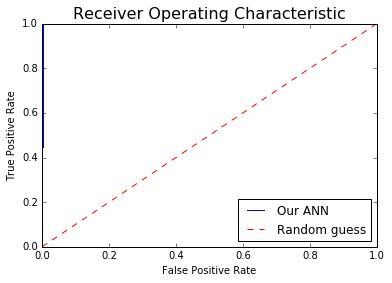

In [85]:
###################################### ROC Curve #########################################################


# True vs. false positive rate
fpr, tpr, threshold = skplt.metrics.roc_curve(y,layers[-1])

plt.title('Receiver Operating Characteristic',fontsize=16)
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.legend(["Our ANN","Random guess"],loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()